# Visualization

Junet has sophisticated plotting capabilities, which are overviewed in this file.

In [1]:
using Junet

In [9]:
g1 = erdosrenyi(100, .05)

Directed multigraph with 100 nodes and 506 edges

In [10]:
g2 = smallworld(20, 8, .2)

Directed multigraph with 20 nodes and 80 edges

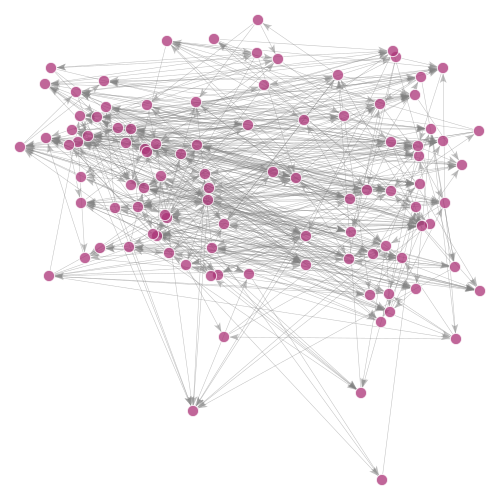

In [11]:
plot(g1)

## Layouts

Now, let us customize this image.

The most fundamental part of network visualization is the layout. There is a choice of different methods for that in Junet.

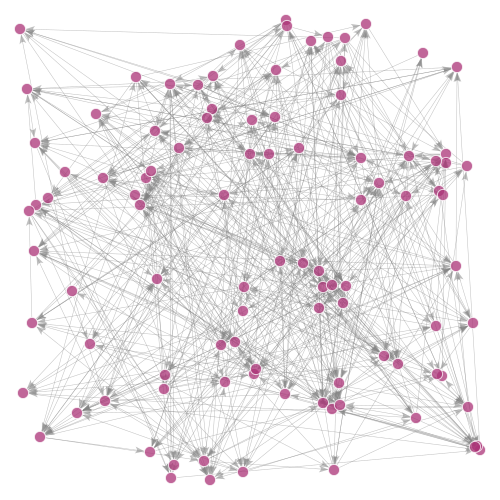

In [14]:
plot(g1, layout=layout_random(g1))

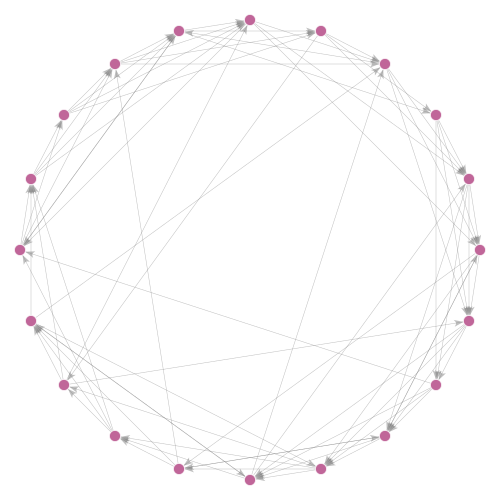

In [13]:
plot(g2, layout=layout_circle(g2))

## Sizes and formats

Junet is built on Cairo, and currently supports the PNG, SVG, and PDF output.

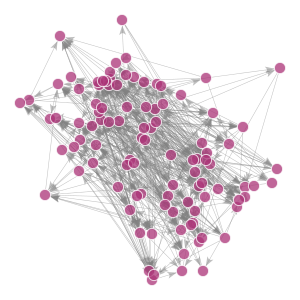

In [18]:
plot(g1, size=(300, 300), format=:svg)

In [19]:
plot(g2, size=(300, 300), format=:pdf, filename="plot.pdf")

## Colors, sizes and shapes

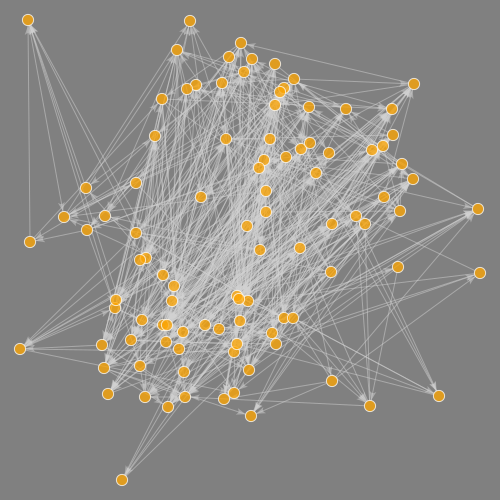

In [35]:
plot(g1, bg_color="grey", node_color="orange", 
    edge_color="lightgray", edge_width=1)

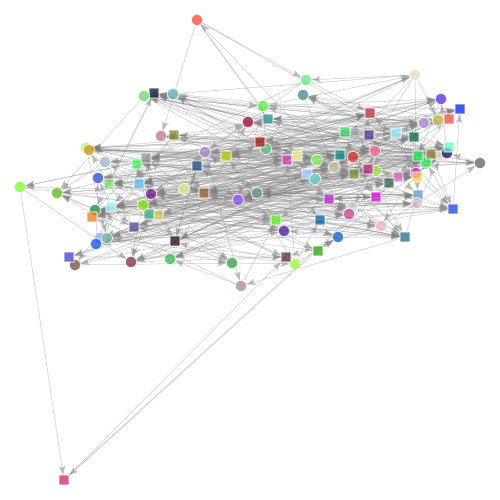

In [33]:
plot(g1, node_color=[(rand(), rand(), rand()) for _=nodes(g)],
        node_shape=[(:circle, :square)[rand(1:2)] for _=nodes(g)])

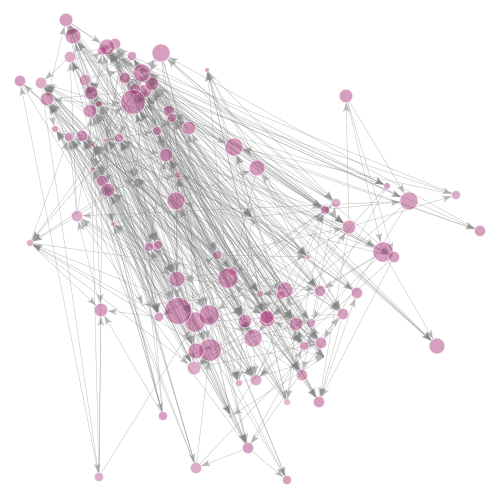

In [39]:
plot(g1, node_size=2indegree(g), node_opacity=rand(nodecount(g)),
    node_opacity=kcores(g)/15)

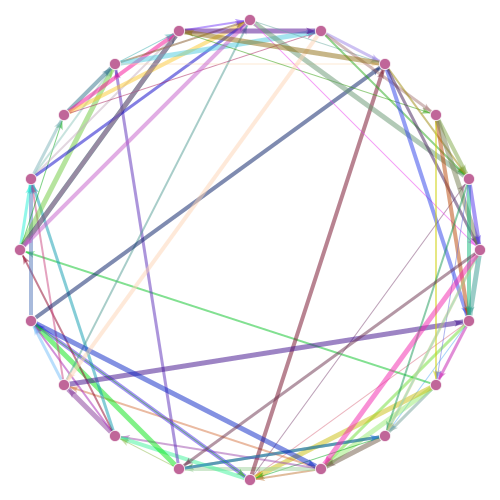

In [41]:
plot(g2, layout=layout_circle(g2),
    edge_color=[(rand(), rand(), rand()) for _=1:edgecount(g)],
    edge_width=rand(1:5, edgecount(g)))

## Additional features

Some advanced features are being currently added to Junet, such as support for curved edges.

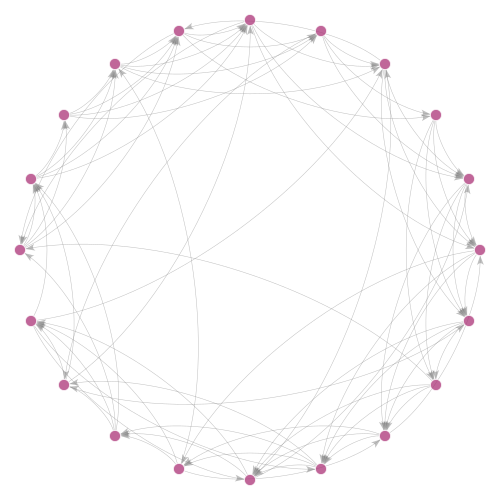

In [15]:
plot(g2, layout=layout_circle(g2), edge_curved=.5)